In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

%matplotlib inline

In [2]:
# import data

# Dow Jones Index
dji = pd.read_csv('data/^DJI.csv')

# S&P 500
gspc = pd.read_csv('data/^GSPC.csv')

# NASDAQ Composite
ixic = pd.read_csv('data/^IXIC.csv')

# Bitcoin
btc = pd.read_csv('data/BTC-USD.csv')

# Etherium
eth = pd.read_csv('data/ETH-USD.csv')

# XRP/Ripple
xrp = pd.read_csv('data/XRP-USD.csv')

# Gold
gold = pd.read_csv('data/GC=F.csv')



In [10]:
print(gold.shape)
gold.head()

(1521, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-04-06,1209.900024,1224.199951,1209.900024,1218.599976,1218.599976,1684.0
1,2015-04-07,1214.800049,1214.800049,1208.199951,1210.599976,1210.599976,343.0
2,2015-04-08,1208.900024,1211.400024,1197.599976,1203.099976,1203.099976,406.0
3,2015-04-09,1201.699951,1202.500000,1193.000000,1193.599976,1193.599976,236.0
4,2015-04-10,1195.800049,1209.599976,1195.800049,1204.599976,1204.599976,521.0


## Calculating moving averages of gold SMA

In [16]:
gold_avg = pd.DataFrame(gold[['Date', 'Close']])

In [17]:
gold_avg.isnull().sum()

Date       0
Close    206
dtype: int64

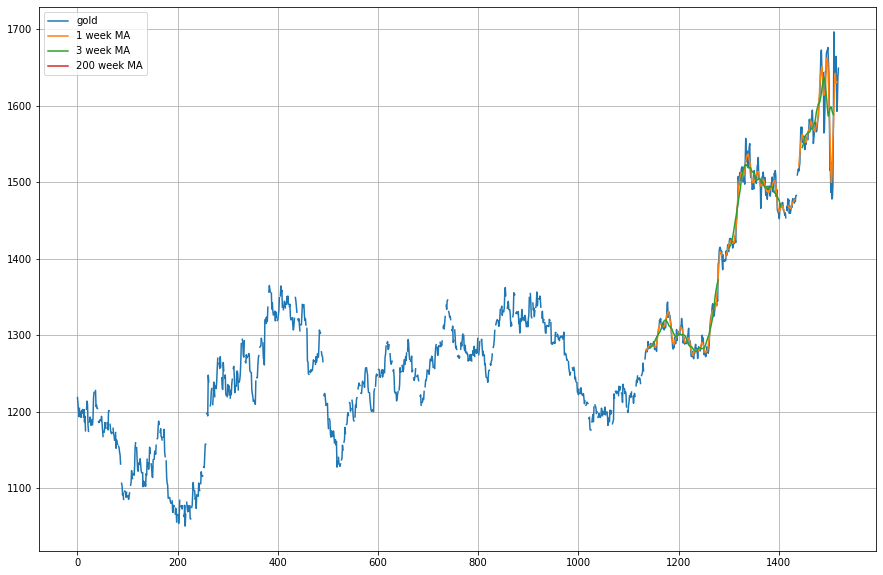

In [18]:
gold_avg['MA_1w'] = gold_avg['Close'].rolling(window=7, center=True).mean()
gold_avg['MA_3w'] = gold_avg['Close'].rolling(window=21, center=True).mean()
gold_avg['MA_200w'] = gold_avg['Close'].rolling(window=1400, center=True).mean()


plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(gold_avg['Close'], label='gold')
plt.plot(gold_avg['MA_1w'], label='1 week MA')
plt.plot(gold_avg['MA_3w'], label='3 week MA')
plt.plot(gold_avg['MA_200w'], label='200 week MA')
plt.legend(loc=2)

In [ ]:
start_date = '2015-01-01'
end_date = '2016-12-31'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'MSFT'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'MSFT'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'MSFT'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

## EMA

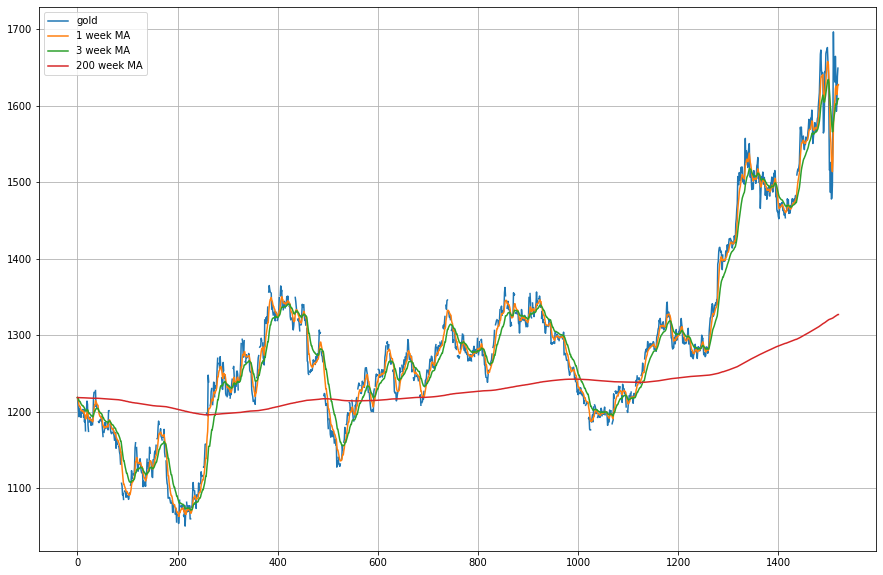

In [15]:
gold_avg['MA_1w'] = gold_avg['Close'].ewm(span=7, adjust=False).mean()
gold_avg['MA_3w'] = gold_avg['Close'].ewm(span=21, adjust=False).mean()
gold_avg['MA_200w'] = gold_avg['Close'].ewm(span=1400, adjust=False).mean()


plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(gold_avg['Close'], label='gold')
plt.plot(gold_avg['MA_1w'], label='1 week MA')
plt.plot(gold_avg['MA_3w'], label='3 week MA')
plt.plot(gold_avg['MA_200w'], label='200 week MA')
plt.legend(loc=2)

In [5]:
gold_avg['Change'] = np.log(gold_avg['Close'] / gold_avg['Close'].shift())

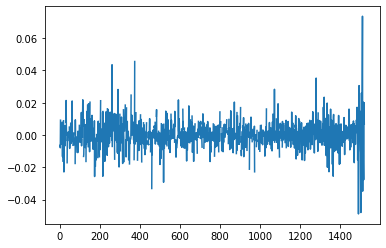

In [6]:
plt.plot(gold_avg['Change'])

## Calculating Volatility of Gold

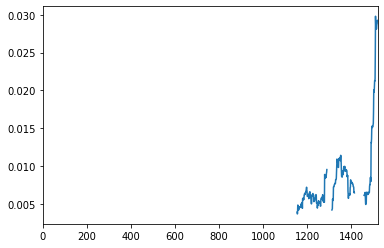

In [7]:
gold_avg['volatility'] = gold_avg['Change'].rolling(21).std().shift()
gold_avg['volatility'].plot()